# Stress Level Detection

The aim of this project is to predict stress level of individuals based on various factors that affect stress level in humans. The dataset used is downloaded from Kaggle and is in csv format-
https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/data

The Sleep Health and Lifestyle Dataset includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.

#### Data dictionary
1. Person ID: An identifier for each individual.
2. Gender: The gender of the person (Male/Female).
3. Age: The age of the person in years.
4. Occupation: The occupation or profession of the person.
5. Sleep Duration (hours): The number of hours the person sleeps per day.
6. Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10, 1 being the worst and 10 being the best.
7. Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.
8. Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10, 1 being the lowest and 10 being the highest.
9. BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).
10. Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
11. Heart Rate (bpm): The resting heart rate of the person in beats per minute.
12. Daily Steps: The number of steps the person takes per day.
13. Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

### Data loading and preprocessing

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [50]:
data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [51]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [53]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [54]:
data.shape

(374, 13)

In [55]:
data.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

The 'Sleep Disorder' column has 219 missing values. Analsying the column and handling the missing values.

In [56]:
data['Sleep Disorder'].value_counts()

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

In [57]:
data[pd.isna(data['Sleep Disorder'])]

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,342,Female,56,Doctor,8.2,9,90,3,Normal Weight,118/75,65,10000,NaN
342,343,Female,56,Doctor,8.2,9,90,3,Normal Weight,118/75,65,10000,NaN
343,344,Female,57,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,NaN
358,359,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,NaN


The NaN values indicate that the person does not have sleep disorder.

In [58]:
data = data.fillna('None')
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [59]:
data['BMI Category'].value_counts()

BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

The term 'Normal Weight' and 'Normal' have the same meaning. Hence, 'Normal weight' can be replaced by 'Normal'.

In [60]:
data['BMI Category'] = data['BMI Category'].replace('Normal Weight', 'Normal')
data[data['BMI Category'] == 'Normal Weight']['BMI Category'].count()

0

In [61]:
#Checking if the dataset contains duplicate rows
data.duplicated().sum()

0

In [62]:
data['Person ID'].value_counts().sum()

374

The 'Person ID' column does not contain relevant information as all the values are unique identifiers.

In [63]:
data.drop('Person ID', axis=1, inplace=True)

In [64]:
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


The 'Blood Pressure' column is of object type and can cause ambiguity during EDA and prediction. Splitting the column into two columns, Systolic BP and Diastolic BP.

In [65]:
data[['Systolic BP','Diastolic BP']] = data['Blood Pressure'].str.split('/', expand=True)

#Converting the columns to numeric datatype and dropping the Blood Pressure column
data[['Systolic BP','Diastolic BP']] = data[['Systolic BP','Diastolic BP']].apply(pd.to_numeric)
data = data.drop('Blood Pressure', axis=1)

In [66]:
data.dtypes

Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
Systolic BP                  int64
Diastolic BP                 int64
dtype: object

In [67]:
#Shifting the column 'Stress Level' to the last position
data = data[[col for col in data if col!='Stress Level'] + ['Stress Level']]

In [68]:
data.head(1)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP,Stress Level
0,Male,27,Software Engineer,6.1,6,42,Overweight,77,4200,None,126,83,6


The dataset contains some categorical columns which need to be converted to numerical datatypes. But first let's do some visualisation of the data and gain insights from it.

### Exploratory Data Analysis

<Axes: xlabel='Stress Level', ylabel='count'>

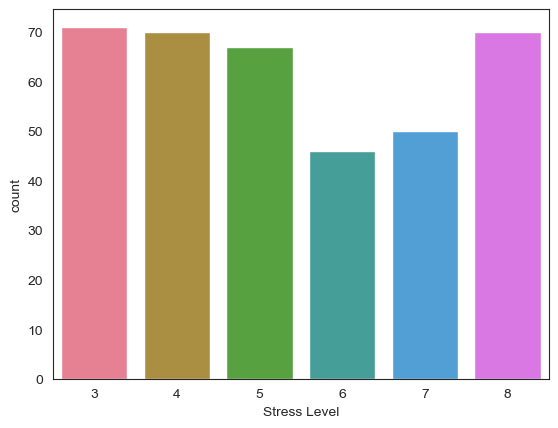

In [69]:
sns.set_style('white', rc = {'figure.figsize':(5,3)})
sns.countplot(x='Stress Level', data=data, palette=sns.color_palette('husl'))

<Axes: xlabel='Gender', ylabel='count'>

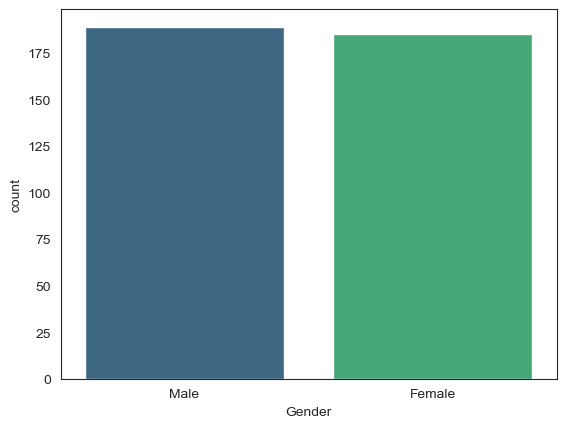

In [70]:
sns.countplot(data=data, x='Gender', palette='viridis')

[Text(0, 0, 'Software Engineer'),
 Text(1, 0, 'Doctor'),
 Text(2, 0, 'Sales Representative'),
 Text(3, 0, 'Teacher'),
 Text(4, 0, 'Nurse'),
 Text(5, 0, 'Engineer'),
 Text(6, 0, 'Accountant'),
 Text(7, 0, 'Scientist'),
 Text(8, 0, 'Lawyer'),
 Text(9, 0, 'Salesperson'),
 Text(10, 0, 'Manager')]

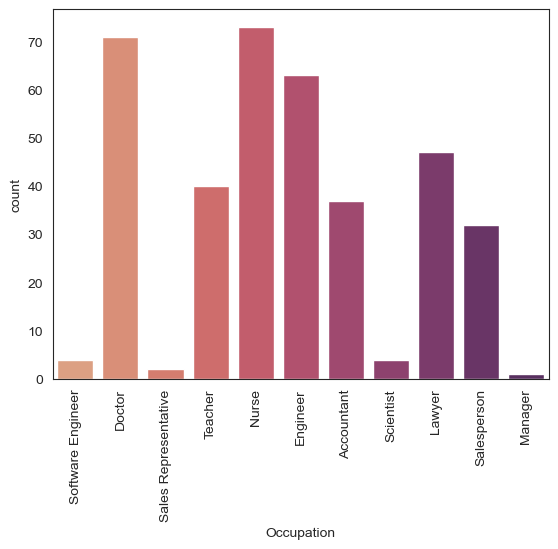

In [71]:
oc = sns.countplot(data=data, x='Occupation', palette='flare')
oc.set_xticklabels(oc.get_xticklabels(), rotation=90)

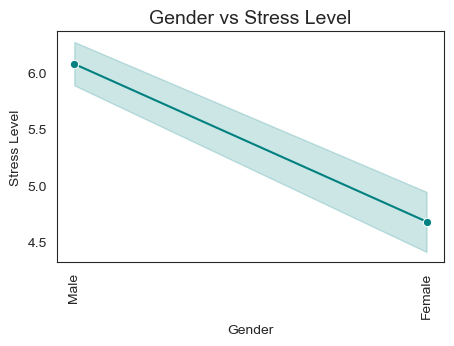

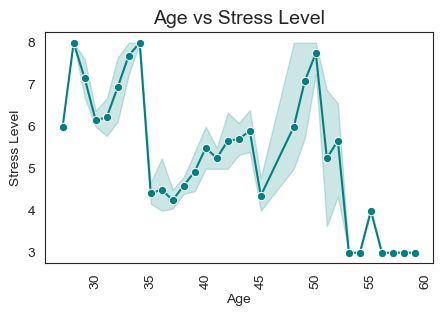

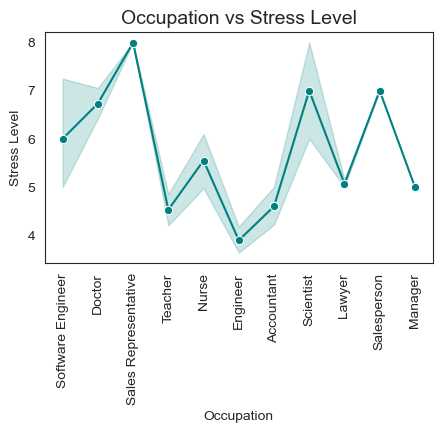

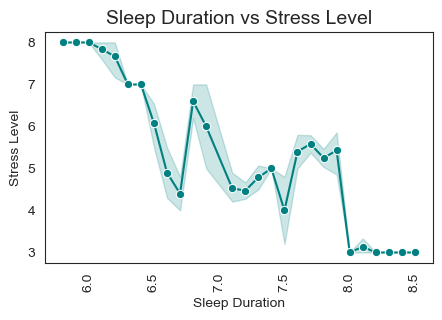

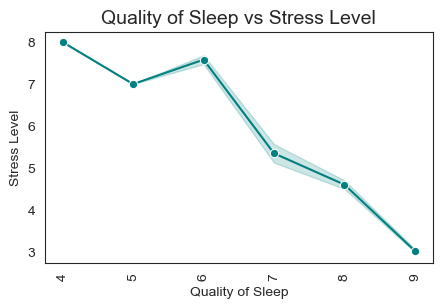

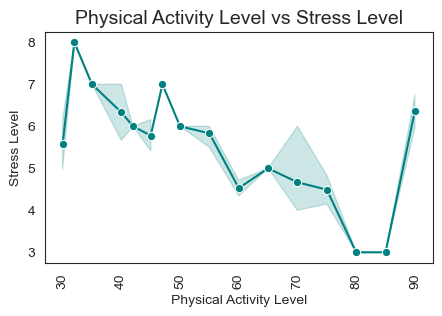

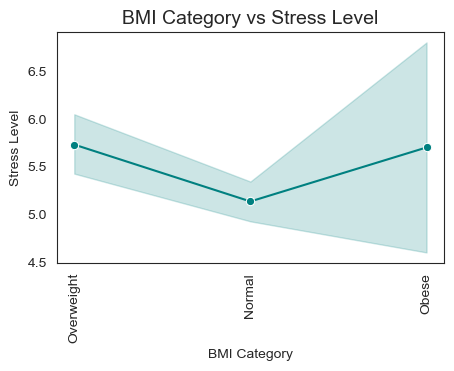

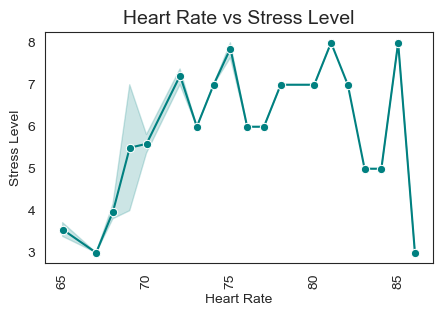

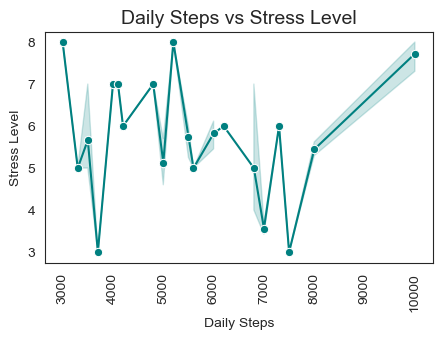

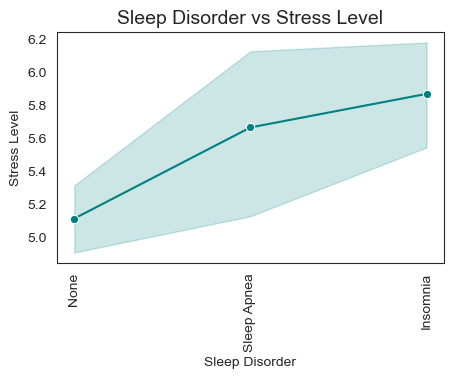

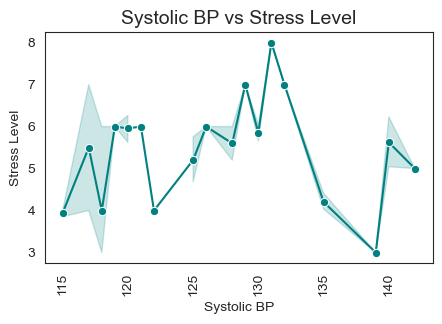

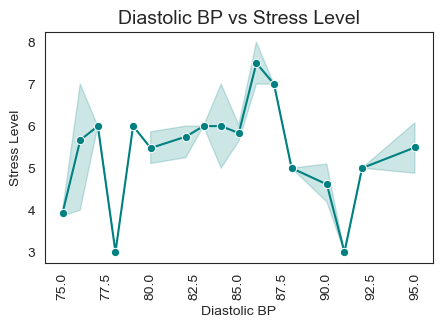

In [72]:
for feature in data[[col for col in data if col!='Stress Level']]:
    plt.figure(figsize=(5, 3))
    sns.lineplot(data=data, x=feature, y='Stress Level', marker='o', color='teal')
    plt.title(f'{feature} vs Stress Level', fontsize=14)
    plt.xlabel(feature)
    plt.xticks(rotation=90)
    plt.ylabel('Stress Level')
    plt.show()

[Text(0, 0, 'Software Engineer'),
 Text(1, 0, 'Doctor'),
 Text(2, 0, 'Sales Representative'),
 Text(3, 0, 'Teacher'),
 Text(4, 0, 'Nurse'),
 Text(5, 0, 'Engineer'),
 Text(6, 0, 'Accountant'),
 Text(7, 0, 'Scientist'),
 Text(8, 0, 'Lawyer'),
 Text(9, 0, 'Salesperson'),
 Text(10, 0, 'Manager')]

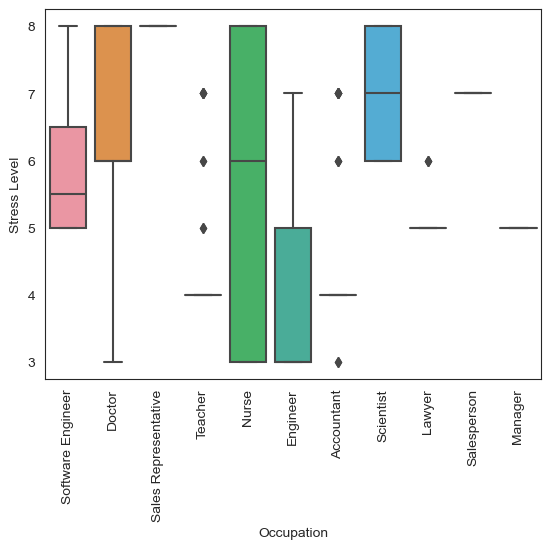

In [73]:
st = sns.boxplot(data=data, x='Occupation', y='Stress Level')
st.set_xticklabels(st.get_xticklabels(), rotation=90)

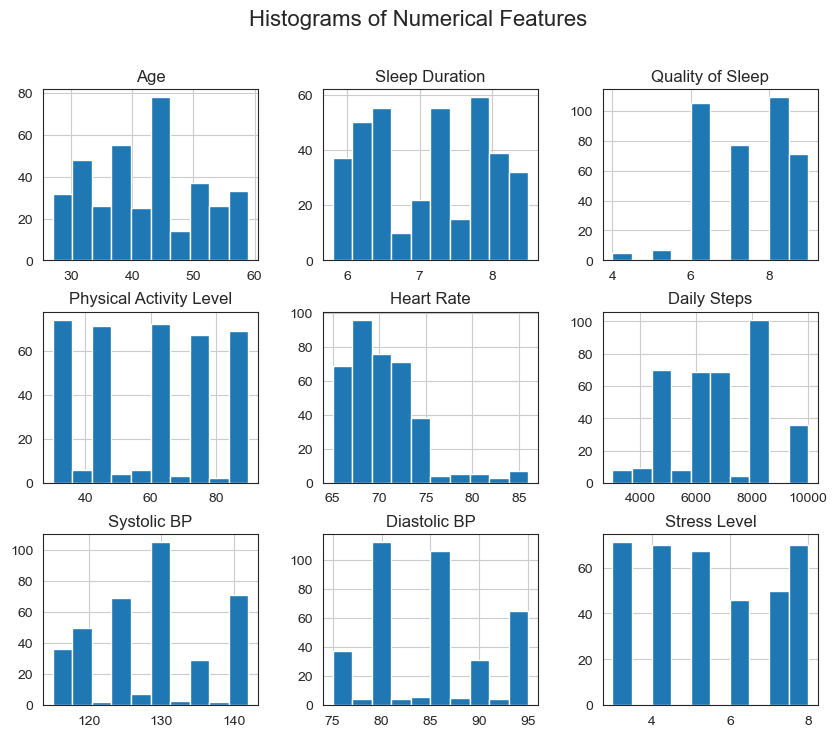

In [74]:
data.hist(figsize=(10, 8))
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

From the above analysis, it is evident that the stress level varies with several factors. Females are generally less stressed that males. People around the age of 20, 33 and 50 experience more than others. Sleep duration and quality of sleep highly affect the stress levels. Obese people are more likely to be stressed than the people of normal weight. The stress levels also depend on the occupation of the person. The heart rate of people increases with increase in stress level.

#### Label encoding
Before analysing the correlation between various features, let's label encode the catagorical columns in the dataset. I am not using one-hot encoding because the number of categories for the occupation column is large, so it may substantially cause dimensionality issues. Also, there does not seem to be a linear relationship between the features and the target variable, so the use of linear model is not suitable. 

In [75]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [76]:
label_encoder=LabelEncoder()

In [77]:
cat_cols=['Gender','Occupation','BMI Category','Sleep Disorder']
for col in cat_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [78]:
data.head(2)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP,Stress Level
0,1,27,9,6.1,6,42,2,77,4200,1,126,83,6
1,1,28,1,6.2,6,60,0,75,10000,1,125,80,8


In [79]:
data['Occupation'].unique()

array([ 9,  1,  6, 10,  5,  2,  0,  8,  3,  7,  4])

<function matplotlib.pyplot.show(close=None, block=None)>

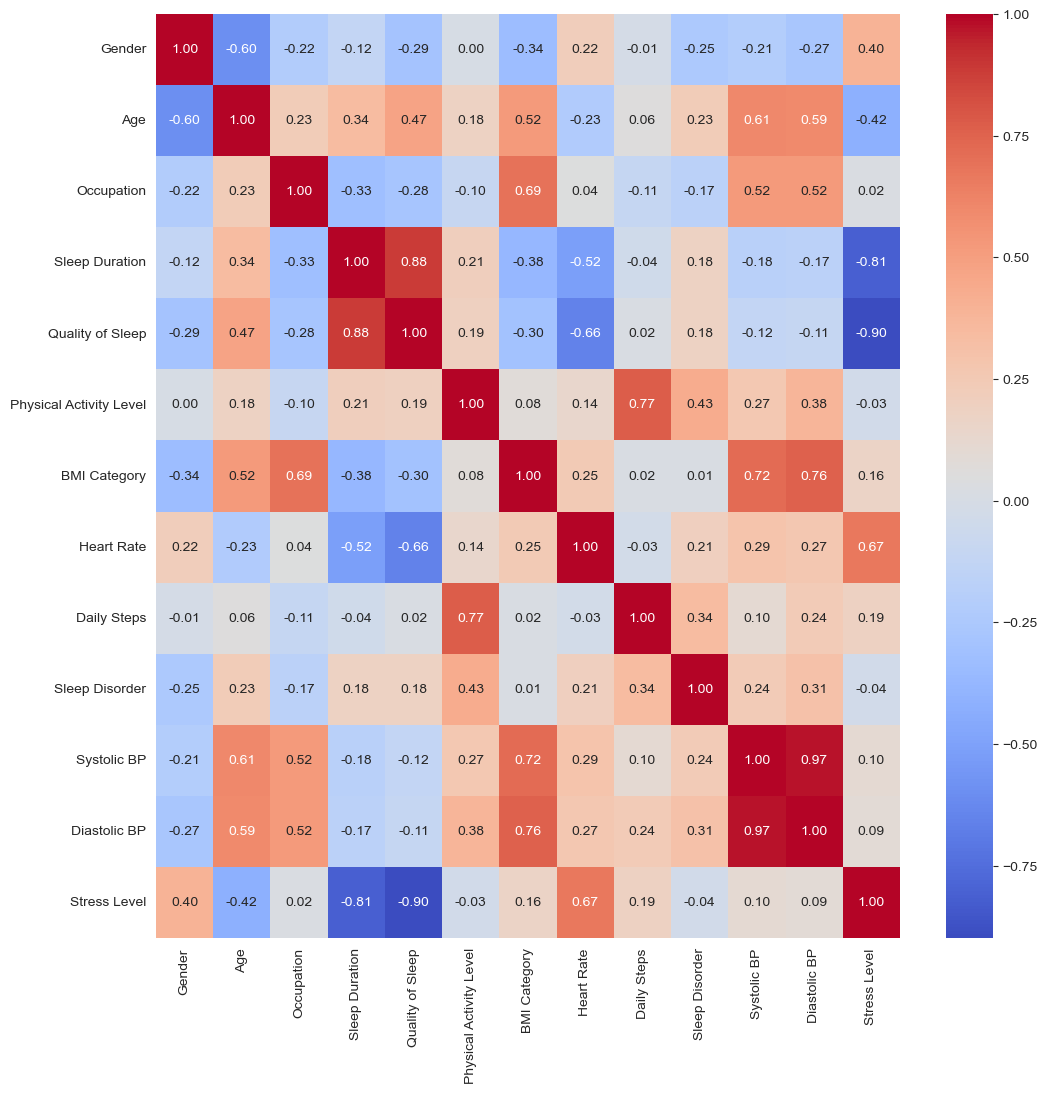

In [80]:
plt.figure(figsize = (12, 12))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.show

1. For features with high correlation, we can remove one of them to reduce redundancy.
2. We can drop features which have low correlation to target variable.
3. We should keep with high correlation to the target, even if they are correlated with other features.

Systolic BP and Diastolic BP are highly correlated so we drop one of them.
Sleep duration and quality of sleep are also high correlated but they have a high negative correlation to the target, so we keep both of them.

Occupation, Physical Activity Level and Sleep Disorder have very low correlation with the target, so we drop them.

In [81]:
data.drop('Sleep Disorder', axis=1, inplace=True)
data.drop('Physical Activity Level', axis=1, inplace=True)
data.drop('Diastolic BP', axis=1, inplace=True)
data.drop('Occupation', axis=1, inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

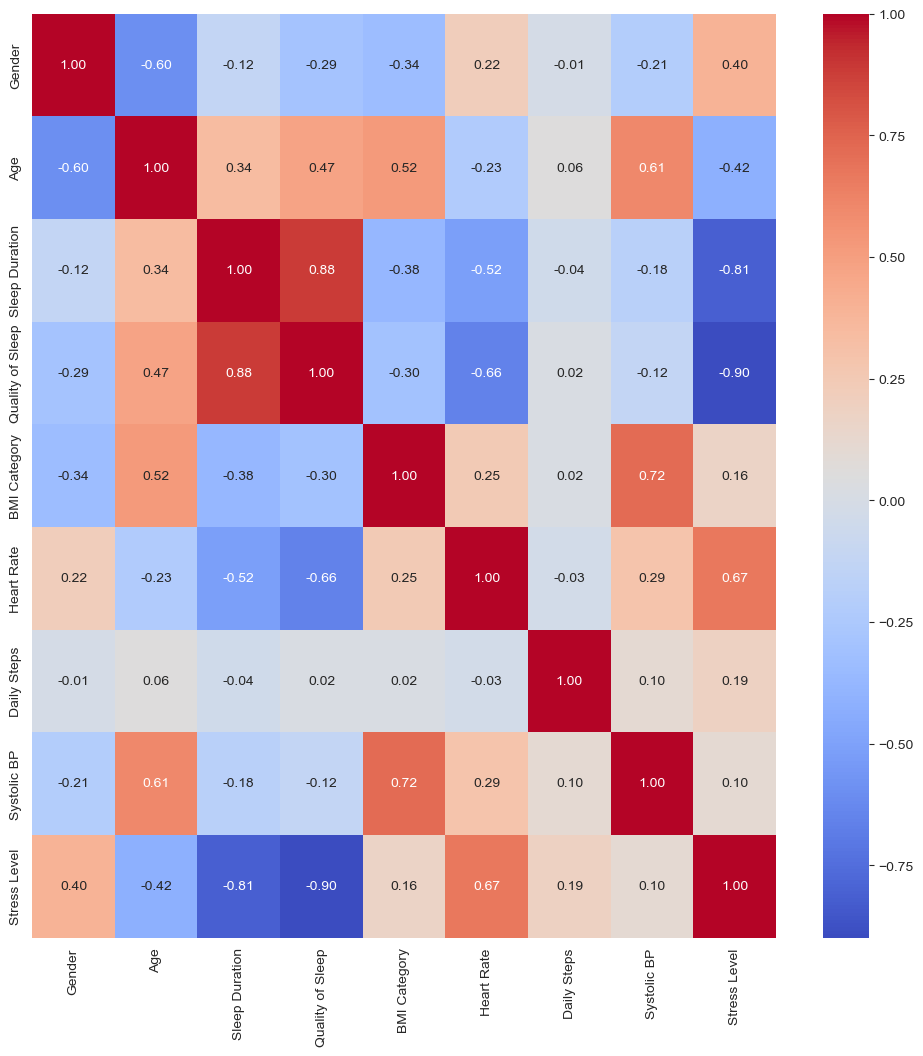

In [82]:
plt.figure(figsize = (12, 12))
corr_matrix1 = data.corr()
sns.heatmap(corr_matrix1, cmap='coolwarm', annot=True, fmt='.2f')
plt.show

In [83]:
data.head(1)

,Gender,Age,Sleep Duration,Quality of Sleep,BMI Category,Heart Rate,Daily Steps,Systolic BP,Stress Level
0,1,27,6.1,6,2,77,4200,126,6


### Model implementation

In [84]:
from sklearn.model_selection import train_test_split  
from sklearn.metrics import confusion_matrix           
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression    
from sklearn.ensemble import RandomForestClassifier    
from sklearn.tree import DecisionTreeClassifier        
from sklearn.svm import SVC                                    
from sklearn.neighbors import KNeighborsClassifier

In [85]:
X = data.drop(columns=['Stress Level']) 
y = data['Stress Level']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (299, 8)
y_train shape: (299,)
X_test shape: (75, 8)
y_test shape: (75,)


In [88]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

In [89]:
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['liblinear']
    },
    'Random Forest': {
        'n_estimators': [5, 10, 15, 20, 30],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance']
    }
}

In [90]:
results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    print(f"Best Parameters for {model_name}: {best_params}")
    print(f"Best Cross-validation Score for {model_name}: {best_score:.4f}")
    
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    results[model_name] = {
        'Best Parameters': best_params,
        'Best Model': best_model,  
        'Best CV Score': best_score,
        'Test Accuracy': accuracy,
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report
    }


Training Logistic Regression...
Best Parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-validation Score for Logistic Regression: 0.8996
Training Random Forest...
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 20}
Best Cross-validation Score for Random Forest: 0.9599
Training KNN...
Best Parameters for KNN: {'n_neighbors': 3, 'weights': 'distance'}
Best Cross-validation Score for KNN: 0.9299


In [91]:
for model_name, result in results.items():
    print(f"\n{model_name} Results:")
    print(f"Best Parameters: {result['Best Parameters']}")
    print(f"Best Cross-validation Score: {result['Best CV Score']:.4f}")
    print(f"Test Accuracy: {result['Test Accuracy']:.4f}")
    print(f"Confusion Matrix:\n{result['Confusion Matrix']}")
    print(f"Classification Report:\n{result['Classification Report']}")


Logistic Regression Results:
Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-validation Score: 0.8996
Test Accuracy: 0.9067
Confusion Matrix:
[[12  0  0  0  0  0]
 [ 0  9  1  0  0  0]
 [ 0  1 11  0  2  0]
 [ 0  2  0  8  0  0]
 [ 0  0  0  0 11  1]
 [ 0  0  0  0  0 17]]
Classification Report:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00        12
           4       0.75      0.90      0.82        10
           5       0.92      0.79      0.85        14
           6       1.00      0.80      0.89        10
           7       0.85      0.92      0.88        12
           8       0.94      1.00      0.97        17

    accuracy                           0.91        75
   macro avg       0.91      0.90      0.90        75
weighted avg       0.91      0.91      0.91        75


Random Forest Results:
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 20}
Best Cross-validation Score:

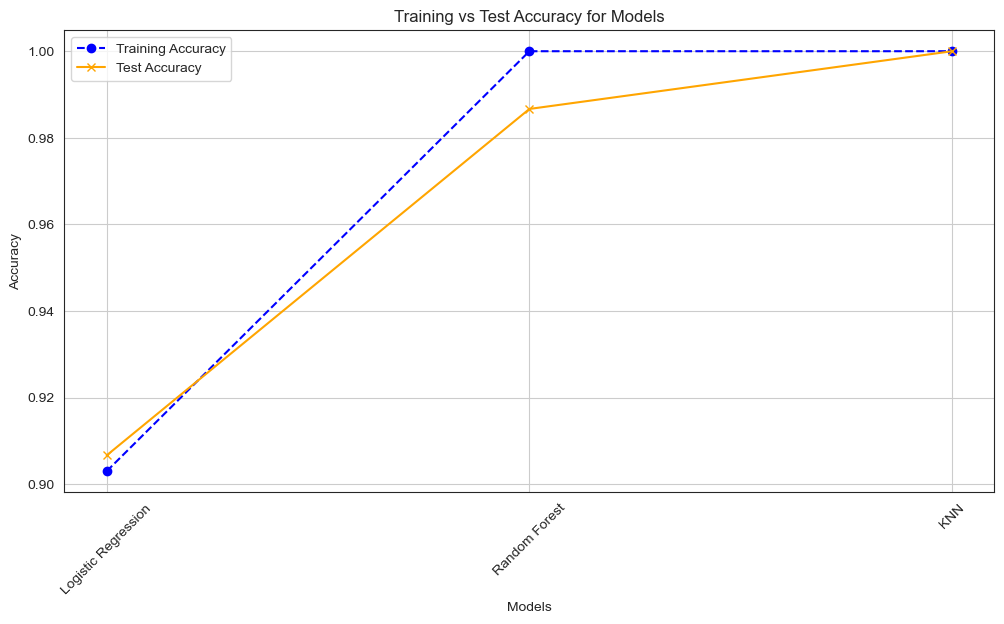

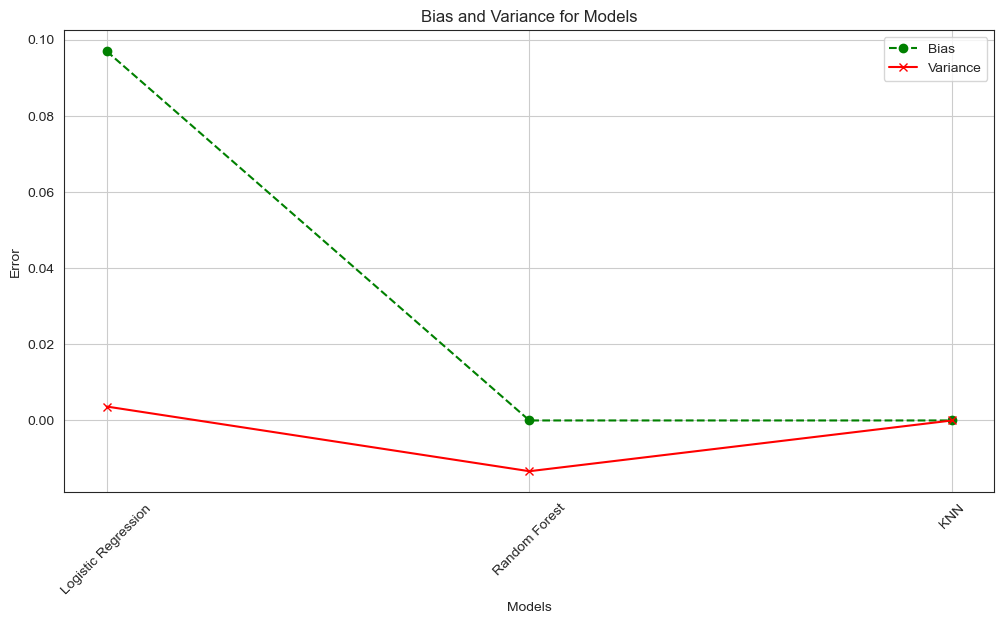

In [92]:
training_accuracies = {}
test_accuracies = {}
biases = {}
variances = {}

for model_name, model_info in results.items():
    best_model = model_info['Best Model'] 

    train_preds = best_model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_preds)

    y_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)

    bias = 1 - train_accuracy
    variance = test_accuracy - train_accuracy

    training_accuracies[model_name] = train_accuracy
    test_accuracies[model_name] = test_accuracy
    biases[model_name] = bias
    variances[model_name] = variance

plt.figure(figsize=(12, 6))
plt.plot(list(training_accuracies.keys()), list(training_accuracies.values()), label='Training Accuracy', marker='o', linestyle='--', color='blue')
plt.plot(list(test_accuracies.keys()), list(test_accuracies.values()), label='Test Accuracy', marker='x', linestyle='-', color='orange')
plt.title('Training vs Test Accuracy for Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(list(biases.keys()), list(biases.values()), label='Bias', marker='o', linestyle='--', color='green')
plt.plot(list(variances.keys()), list(variances.values()), label='Variance', marker='x', linestyle='-', color='red')
plt.title('Bias and Variance for Models')
plt.xlabel('Models')
plt.ylabel('Error')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [96]:
from sklearn.model_selection import learning_curve
from mlxtend.evaluate import bias_variance_decomp

def plot_learning_curve(model, X_train, y_train):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1
    )
    
    train_mean = train_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    test_mean = test_scores.mean(axis=1)
    test_std = test_scores.std(axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training Accuracy')
    plt.plot(train_sizes, test_mean, label='Validation Accuracy')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.title('Learning Curve')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    

def plot_bias_variance(model, X_train, y_train, X_test, y_test):
    X_train_np = X_train.values
    y_train_np = y_train.values
    X_test_np = X_test.values
    y_test_np = y_test.values
    
    if isinstance(model, LogisticRegression):
        bias, variance, _ = bias_variance_decomp(
            model.set_params(random_state=42),
            X_train_np, y_train_np, X_test_np, y_test_np, loss='mse', num_rounds=200
        )
    else:
        bias, variance, _ = bias_variance_decomp(
            model, X_train_np, y_train_np, X_test_np, y_test_np, loss='0-1_loss', num_rounds=200
        )
    
    plt.figure(figsize=(10, 6))
    plt.bar(['Bias', 'Variance'], [bias, variance])
    plt.title('Bias-Variance Decomposition')
    plt.xlabel('Error Component')
    plt.ylabel('Value')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    print(f"Bias: {bias:.4f}")
    print(f"Variance: {variance:.4f}")

Plotting for Logistic Regression...


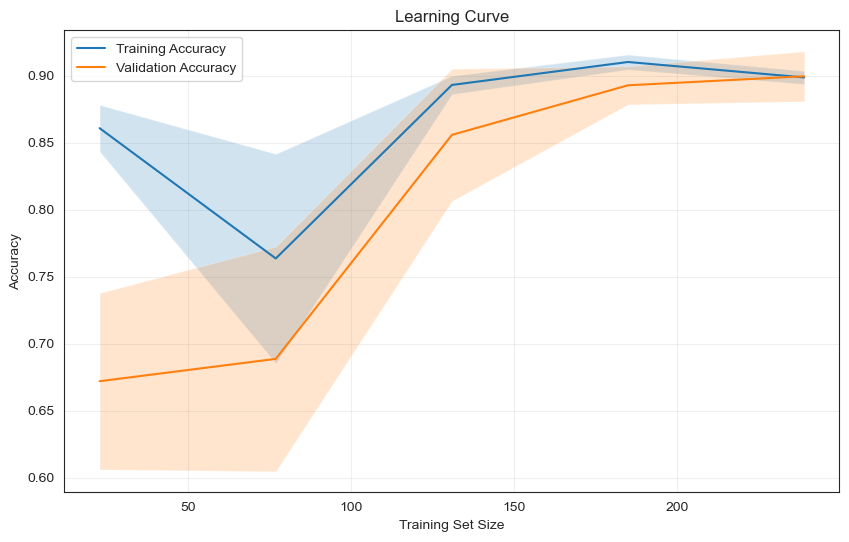

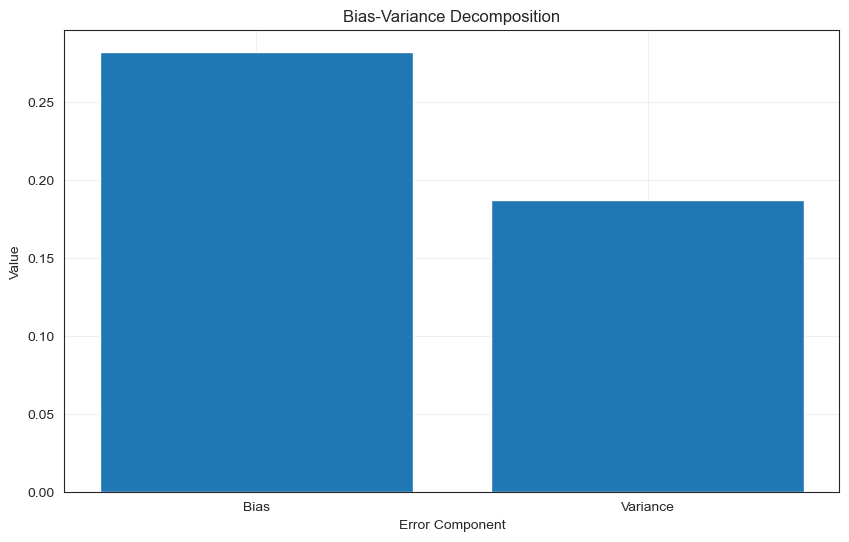

Bias: 0.2819
Variance: 0.1870
Plotting for Random Forest...


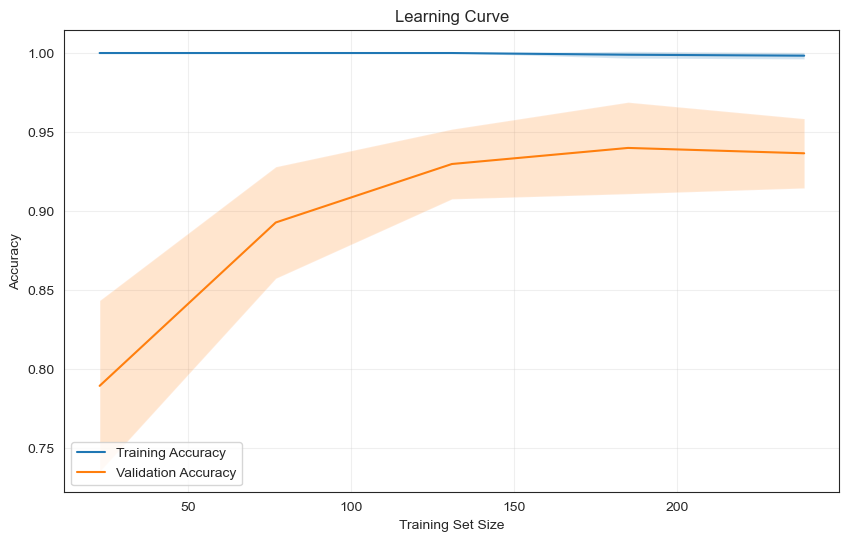

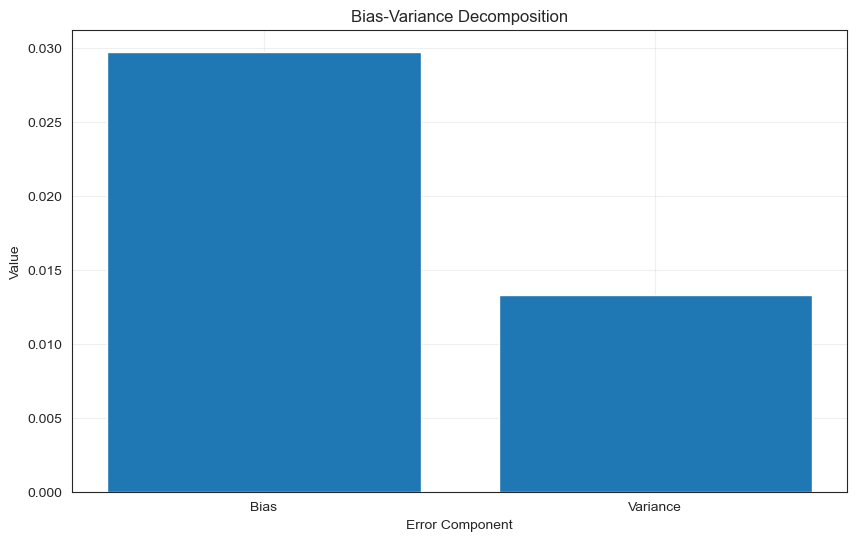

Bias: 0.0297
Variance: 0.0133
Plotting for KNN...


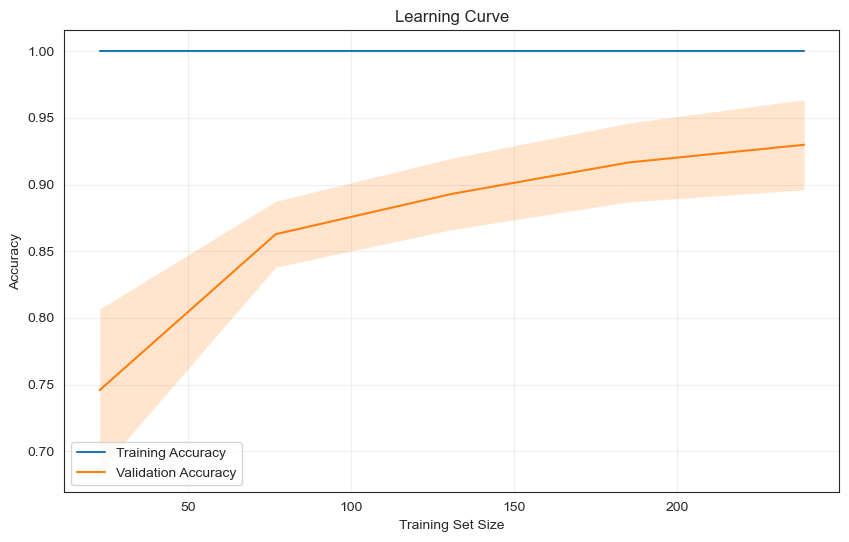

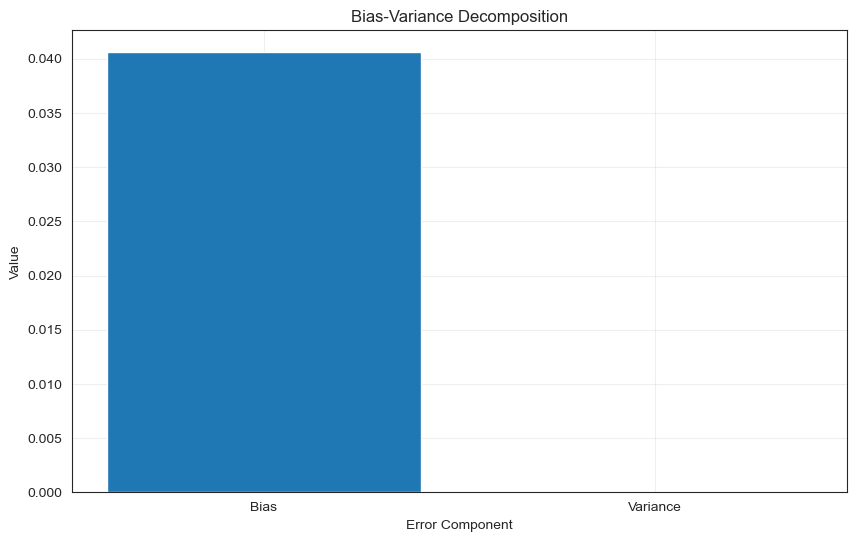

Bias: 0.0406
Variance: 0.0000


In [97]:
for model_name, model_info in results.items():
    print(f"Plotting for {model_name}...")
    best_model = model_info['Best Model']
    plot_learning_curve(best_model, X_train, y_train)
    plot_bias_variance(best_model, X_train, y_train, X_test, y_test)

According to the evaluation above, KNN classifier outperformed Logistic Regression and Random forest classifier with a cross validation score of 0.93 and a text accuracy of 1. Also, KNN classifier has the lowest bias and variance amongst all models. Furthermore, it's important to acknowledge the impact of data size on model performance. With a relatively small dataset, the ability of models to generalize might be compromised, leading to variations in performance.